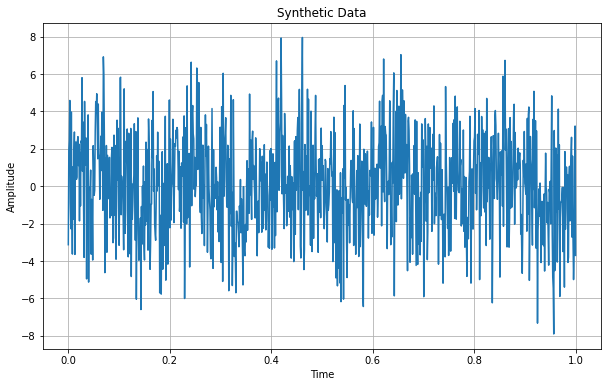

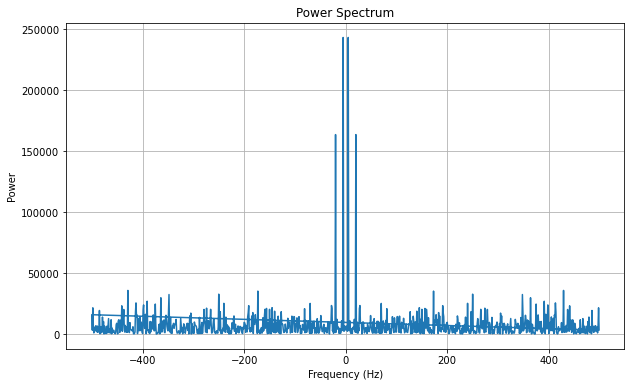

Recovered frequencies from spectrum: [ 5. -5.]


In [2]:
#chat

import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
def generate_synthetic_data(num_samples, freq1, freq2, noise_level=0):
    t = np.linspace(0, 1, num_samples)
    signal1 = np.sin(2 * np.pi * freq1 * t)
    signal2 = np.sin(2 * np.pi * freq2 * t)
    noise = np.random.normal(0, noise_level, num_samples)
    synthetic_data = signal1 + signal2 + noise
    return t, synthetic_data

# Perform Fourier transform to recover frequencies
def recover_frequencies(data, sampling_rate):
    N = len(data)
    frequencies = np.fft.fftfreq(N, d=1/sampling_rate)
    fft_data = np.fft.fft(data)
    power_spectrum = np.abs(fft_data)**2
    return frequencies, power_spectrum

# Parameters for synthetic data
num_samples = 1000
sampling_rate = 1000  # Hz
freq1 = 5  # Hz
freq2 = 20  # Hz
noise_level = 02.5

# Generate synthetic data
time, synthetic_data = generate_synthetic_data(num_samples, freq1, freq2, noise_level)

# Plot synthetic data
plt.figure(figsize=(10, 6))
plt.plot(time, synthetic_data)
plt.title('Synthetic Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Perform Fourier transform
frequencies, power_spectrum = recover_frequencies(synthetic_data, sampling_rate)

# Plot power spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()

# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-2:]  # Get indices of two highest peaks
peak_freqs = frequencies[peaks_idx]  # Get corresponding frequencies
print("Recovered frequencies from spectrum:", peak_freqs)



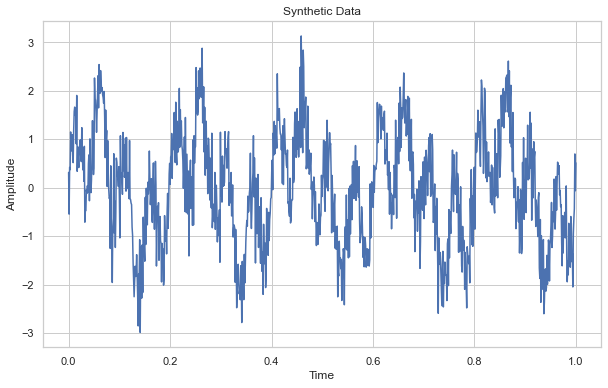

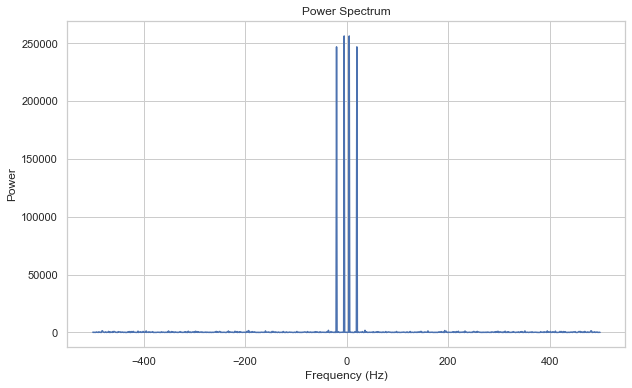

Recovered frequencies from spectrum: [ 5. -5.]


In [3]:
#chat pretty
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Generate synthetic data
def generate_synthetic_data(num_samples, freq1, freq2, noise_level=0, t = np.linspace(0, 1, num_samples)):
    signal1 = np.sin(2 * np.pi * freq1 * t)
    signal2 = np.sin(2 * np.pi * freq2 * t)
    noise = np.random.normal(0, noise_level, num_samples)
    synthetic_data = signal1 + signal2 + noise
    return synthetic_data

# Perform Fourier transform to recover frequencies
def recover_frequencies(data, sampling_rate):
    N = len(data)
    frequencies = np.fft.fftfreq(N, d=1/sampling_rate)
    fft_data = np.fft.fft(data)
    power_spectrum = np.abs(fft_data)**2
    return frequencies, power_spectrum

# Parameters for synthetic data
num_samples = 1000
sampling_rate = 1000  # Hz
freq1 = 5  # Hz
freq2 = 20  # Hz
noise_level = 0.5
time = np.linspace(0, 1, num_samples)

# Generate synthetic data
synthetic_data = generate_synthetic_data(num_samples, freq1, freq2, noise_level)

# Plot synthetic data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=synthetic_data)
plt.title('Synthetic Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Perform Fourier transform
frequencies, power_spectrum = recover_frequencies(synthetic_data, sampling_rate)

# Plot power spectrum
plt.figure(figsize=(10, 6))
sns.lineplot(x=frequencies, y=power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()

# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-2:]  # Get indices of two highest peaks
peak_freqs = frequencies[peaks_idx]  # Get corresponding frequencies
print("Recovered frequencies from spectrum:", peak_freqs)


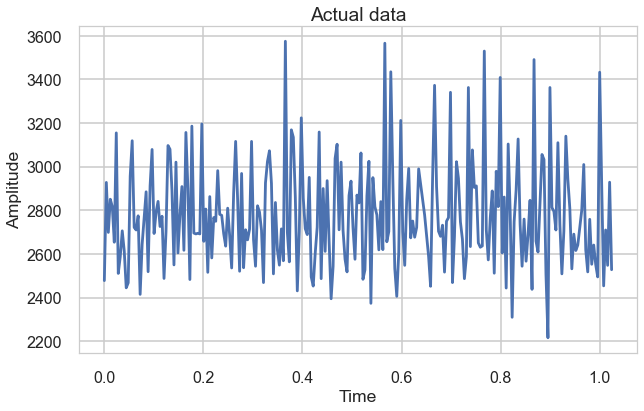

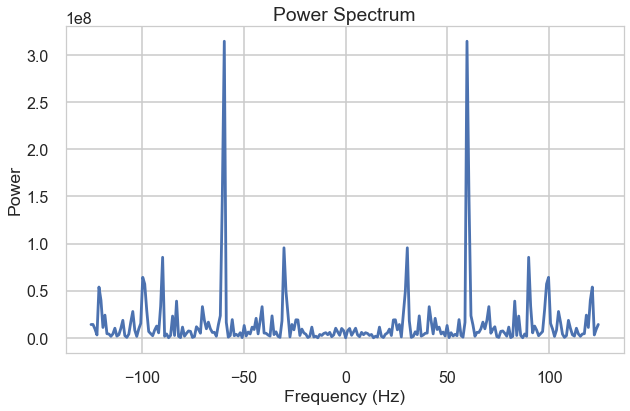

Recovered frequencies from spectrum: [  83.0078125  -83.0078125  120.1171875 -120.1171875   29.296875
  -29.296875   121.09375   -121.09375    -98.6328125   98.6328125
  -99.609375    99.609375    89.84375    -89.84375    -30.2734375
   30.2734375  -60.546875    60.546875   -59.5703125   59.5703125]
59.5703125
60.546875
30.2734375
89.84375
99.609375
98.6328125
121.09375
29.296875
120.1171875
83.0078125


In [38]:
data = np.genfromtxt('pulsar.dat') #import data
number_of_samples = len(data)
periodsample = 0.004 # seconds



time = np.linspace(0, number_of_samples*periodsample, number_of_samples)



# Plot synthetic data
plt.figure(figsize=(10, 6))
sns.lineplot(x=time, y=data)
plt.title('Actual data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

sampling_rate = 1/periodsample  # per milli second

# Perform Fourier transform
frequencies, power_spectrum = recover_frequencies(data, sampling_rate)

# Plot power spectrum
plt.figure(figsize=(10, 6))
power_spectrum[0] = 0 #setting to zero to remove the constant
sns.lineplot(x=frequencies, y=power_spectrum)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
#plt.xlim(0.01, 0.3)
plt.show()


# Find peaks in power spectrum
peaks_idx = np.argsort(power_spectrum)[-20:]  # Get indices of two highest peaks
peak_freqs = frequencies[peaks_idx]  # Get corresponding frequencies
print("Recovered frequencies from spectrum:", peak_freqs)
for i in range(len(peak_freqs)):
    if peak_freqs[len(peak_freqs) - i - 1] > 0:
        print(peak_freqs[len(peak_freqs) - i - 1])


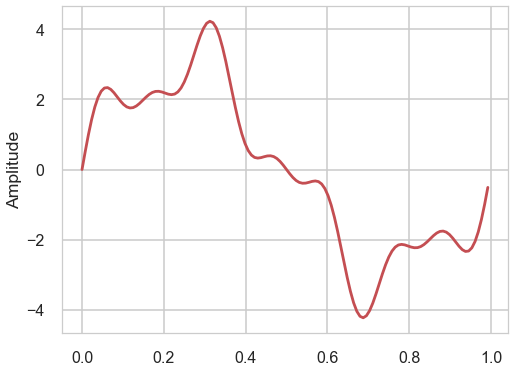

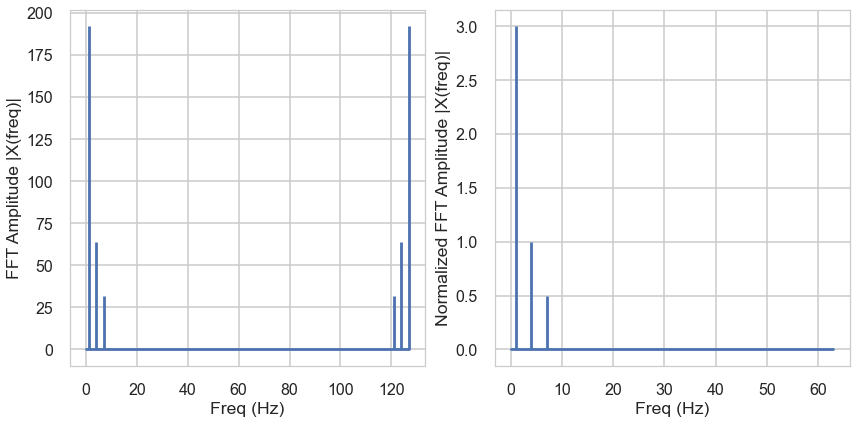

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()    

X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

In [16]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

# sampling rate =2048
sr = 2048
%timeit FFT(gen_sig(sr))

17.1 ms ± 250 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
